Average pulse analysis

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from google.colab import files
uploaded = files.upload()
# Reading the uploaded file
df = pd.read_csv('NIHAI_TABLO_full_reconstructed.csv')

# Displaying the first few rows of the data
df.head()


Saving NIHAI_TABLO_full_reconstructed.csv to NIHAI_TABLO_full_reconstructed (3).csv


,Date,Arda_SleepHours,Arda_RestingHeartrate,Arda_ScreenTime,Arda_CoffeeCount,Arda_WalkingSteps,Ayşe_SleepHours,Ayşe_RestingHeartrate,Ayşe_ScreenTime,Ayşe_CoffeeCount,Ayşe_WalkingDistance
0,2024-10-10,6.9,68.0,3.6,4.0,8716,7.2,54,4.1,0,8694
1,2024-10-11,7.3,65.0,4.3,2.0,8342,7.5,67,5.9,0,2301
2,2024-10-12,7.8,61.0,5.3,2.0,10819,7.2,67,5.5,0,8115
3,2024-10-13,7.1,77.0,4.4,2.0,6246,7.7,66,6.5,0,6630
4,2024-10-14,10.4,73.0,3.7,0.0,4691,6.9,56,5.6,0,5573


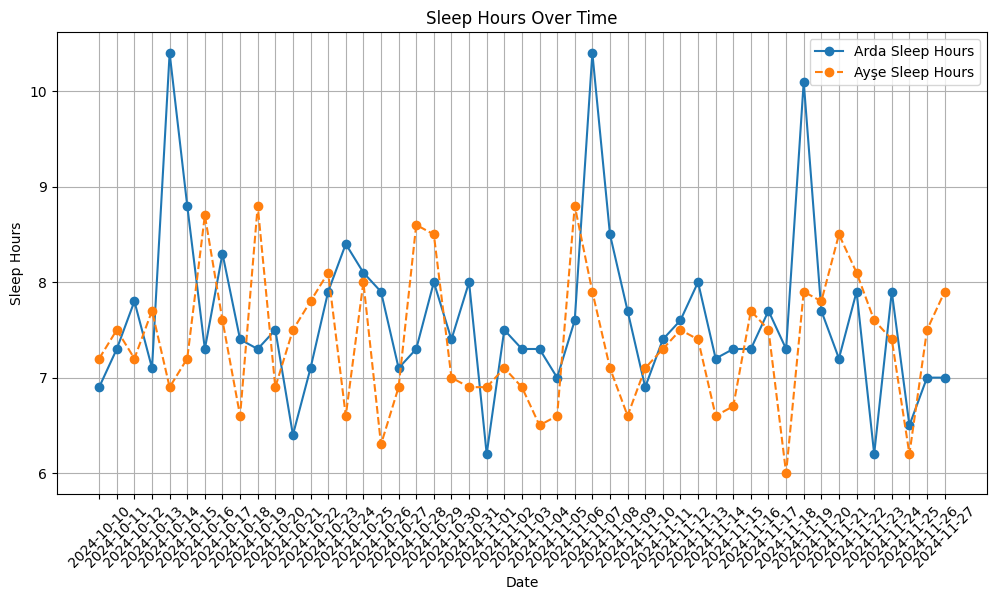

In [28]:
# Time series plot: Sleep hours
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Arda_SleepHours'], label='Arda Sleep Hours', marker='o')
plt.plot(df['Date'], df['Ayşe_SleepHours'], label='Ayşe Sleep Hours', marker='o', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sleep Hours')
plt.title('Sleep Hours Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Resting Heart Rate Statistics for Arda:
 count    49.000000
mean     74.428571
std       6.465453
min      60.000000
25%      72.000000
50%      75.000000
75%      79.000000
max      90.000000
Name: Arda_RestingHeartrate, dtype: float64

Resting Heart Rate Statistics for Ayşe:
 count    49.000000
mean     59.142857
std       5.773503
min      50.000000
25%      55.000000
50%      58.000000
75%      64.000000
max      69.000000
Name: Ayşe_RestingHeartrate, dtype: float64


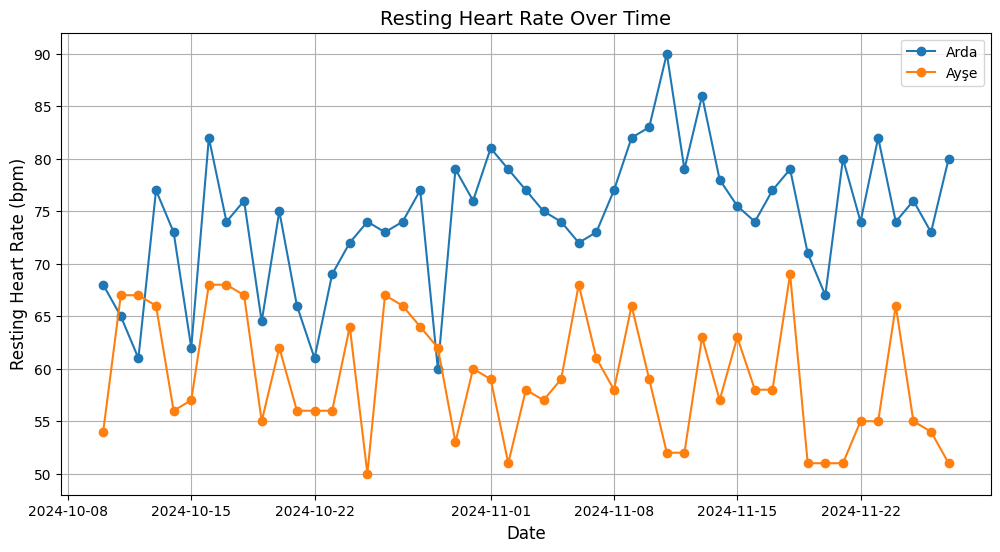

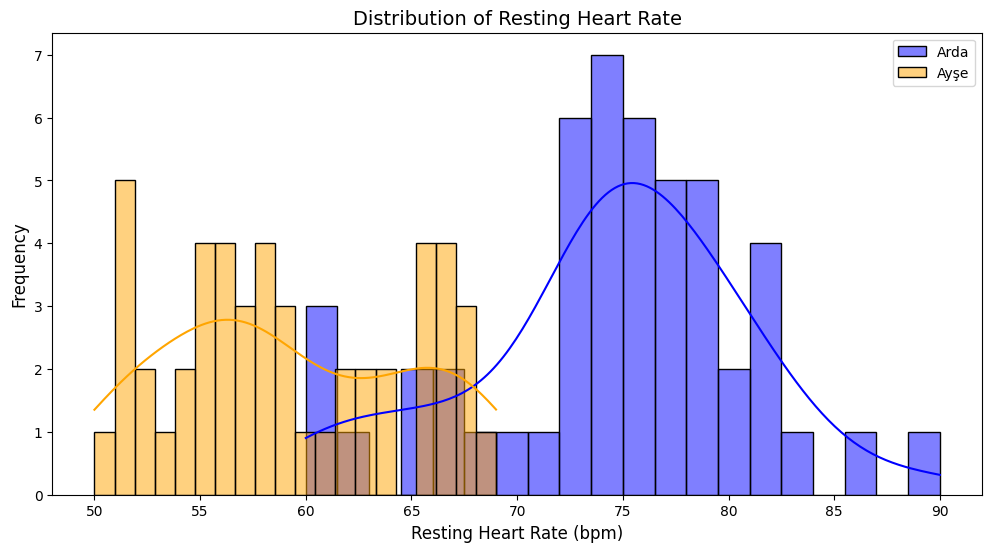

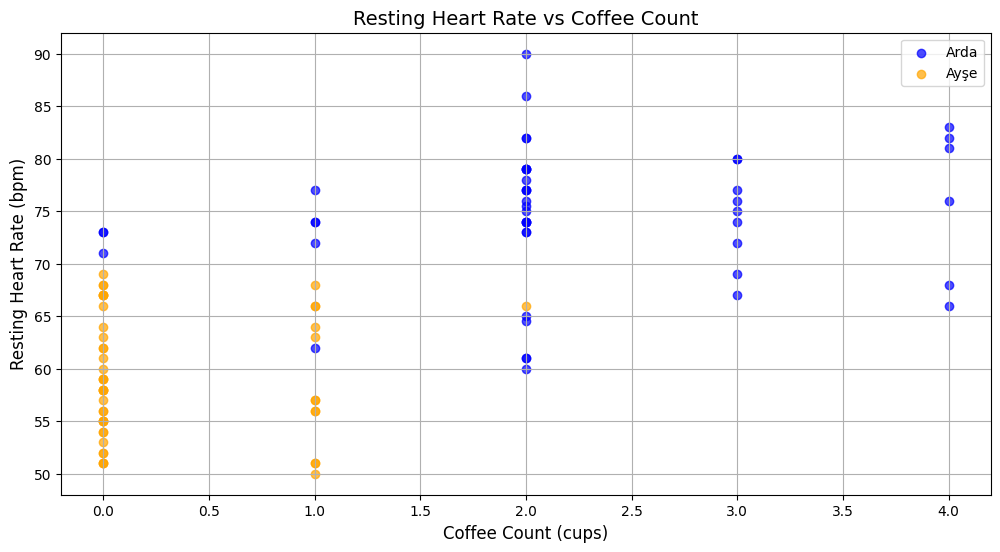

Correlation between Coffee Count and Resting Heart Rate for Arda: 0.14
Correlation between Coffee Count and Resting Heart Rate for Ayşe: 0.06


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('NIHAI_TABLO_full_reconstructed.csv')

# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Summary statistics for resting heart rate
arda_stats = data['Arda_RestingHeartrate'].describe()
ayse_stats = data['Ayşe_RestingHeartrate'].describe()

# Print summary statistics
print("Resting Heart Rate Statistics for Arda:\n", arda_stats)
print("\nResting Heart Rate Statistics for Ayşe:\n", ayse_stats)

# Visualization: Resting heart rate trends over time
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Arda_RestingHeartrate'], label="Arda", marker='o', linestyle='-')
plt.plot(data['Date'], data['Ayşe_RestingHeartrate'], label="Ayşe", marker='o', linestyle='-')
plt.title('Resting Heart Rate Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Resting Heart Rate (bpm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Visualization: Distribution of resting heart rate
plt.figure(figsize=(12, 6))
sns.histplot(data['Arda_RestingHeartrate'], kde=True, color='blue', label='Arda', bins=20)
sns.histplot(data['Ayşe_RestingHeartrate'], kde=True, color='orange', label='Ayşe', bins=20)
plt.title('Distribution of Resting Heart Rate', fontsize=14)
plt.xlabel('Resting Heart Rate (bpm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.show()

# Relationship between resting heart rate and coffee count
plt.figure(figsize=(12, 6))
plt.scatter(data['Arda_CoffeeCount'], data['Arda_RestingHeartrate'], color='blue', label='Arda', alpha=0.7)
plt.scatter(data['Ayşe_CoffeeCount'], data['Ayşe_RestingHeartrate'], color='orange', label='Ayşe', alpha=0.7)
plt.title('Resting Heart Rate vs Coffee Count', fontsize=14)
plt.xlabel('Coffee Count (cups)', fontsize=12)
plt.ylabel('Resting Heart Rate (bpm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Correlation analysis
arda_corr = data[['Arda_CoffeeCount', 'Arda_RestingHeartrate']].corr().iloc[0, 1]
ayse_corr = data[['Ayşe_CoffeeCount', 'Ayşe_RestingHeartrate']].corr().iloc[0, 1]

print(f"Correlation between Coffee Count and Resting Heart Rate for Arda: {arda_corr:.2f}")
print(f"Correlation between Coffee Count and Resting Heart Rate for Ayşe: {ayse_corr:.2f}")



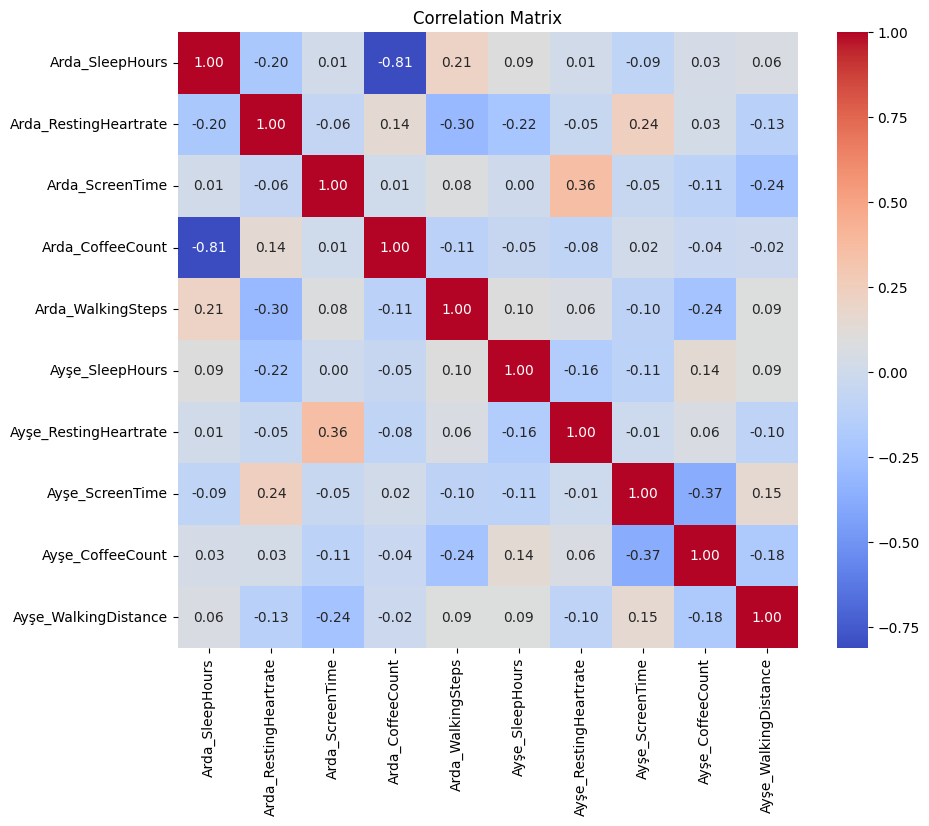

In [30]:
# Create the correlation matrix by selecting only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


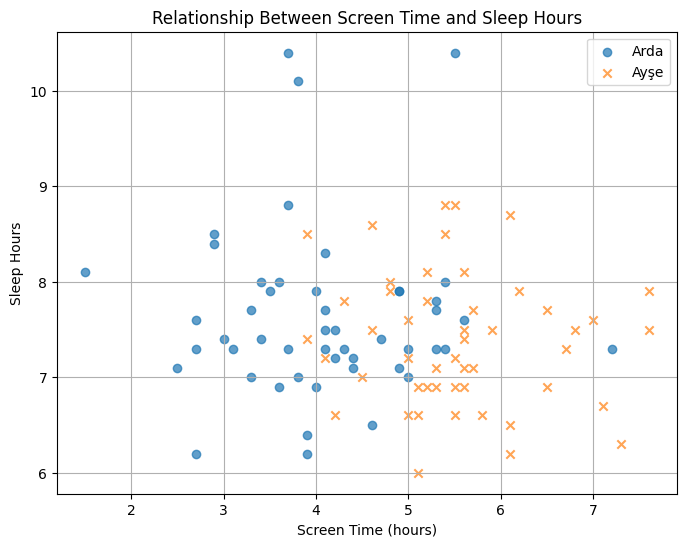

In [31]:
# Visualizing the relationship between sleep hours and screen time with a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Arda_ScreenTime'], df['Arda_SleepHours'], label='Arda', alpha=0.7)
plt.scatter(df['Ayşe_ScreenTime'], df['Ayşe_SleepHours'], label='Ayşe', alpha=0.7, marker='x')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Sleep Hours')
plt.title('Relationship Between Screen Time and Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()


Model Coefficient (Slope): 0.017469124753892923
Model Intercept: 7.636192351291688
Mean Squared Error (MSE): 0.4642733541525989
R-Squared (R2): -0.6070382629027307


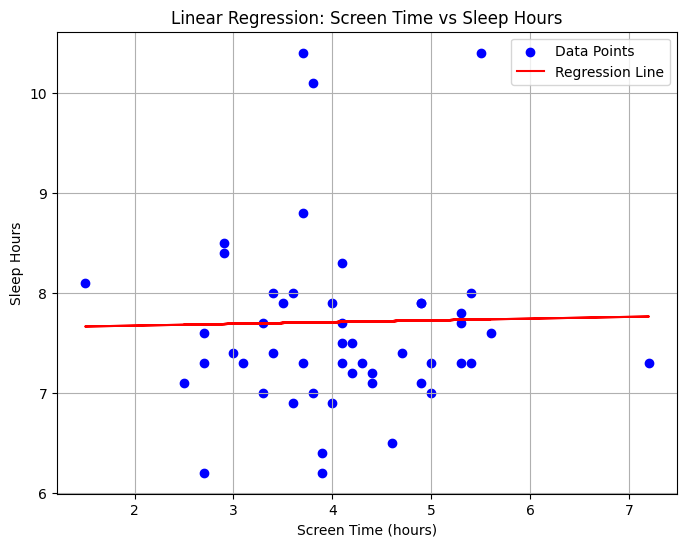

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Data Preparation
X = df[['Arda_ScreenTime']]  # Independent variable (screen time)

y = df['Arda_SleepHours']    # Dependent variable (sleep hours)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model creation and training
model = LinearRegression()
model.fit(X_train, y_train)

# Displaying model parameters
print(f"Model Coefficient (Slope): {model.coef_[0]}")
print(f"Model Intercept: {model.intercept_}")

# 3. Evaluating model performance
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")

# 4. Visualizing the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Sleep Hours')
plt.title('Linear Regression: Screen Time vs Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()


Mean Squared Error (MSE): 0.19713339999999896
R-Squared (R2): 0.3176413984077572

Feature Importances:
                Feature  Importance
1      Arda_CoffeeCount    0.873641
2     Arda_WalkingSteps    0.045996
5  Ayşe_WalkingDistance    0.039364
3       Ayşe_ScreenTime    0.021551
0       Arda_ScreenTime    0.015540
4      Ayşe_CoffeeCount    0.003908


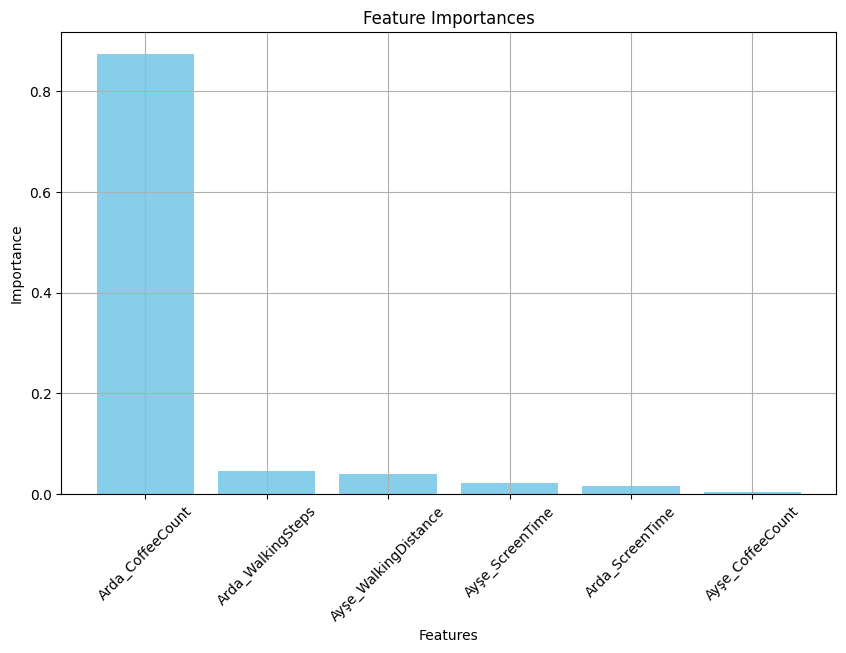

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt
# 1. Selection of target and independent variables
X = df[['Arda_ScreenTime', 'Arda_CoffeeCount', 'Arda_WalkingSteps',
        'Ayşe_ScreenTime', 'Ayşe_CoffeeCount', 'Ayşe_WalkingDistance']]
y = df['Arda_SleepHours']

# 2. Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Random Forest Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")

# 4. Examining feature importance
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importances)

# 5. Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [34]:
from sklearn.model_selection import GridSearchCV

# Parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Finding the best parameters with GridSearch
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5,
                           verbose=2)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_

# Evaluating performance with the new model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R2): {r2}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, min_s

In [35]:
from sklearn.linear_model import LinearRegression

# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_lr = linear_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R²: {r2_lr}")


Linear Regression MSE: 0.6348850808173753
Linear Regression R²: -1.197594603036951


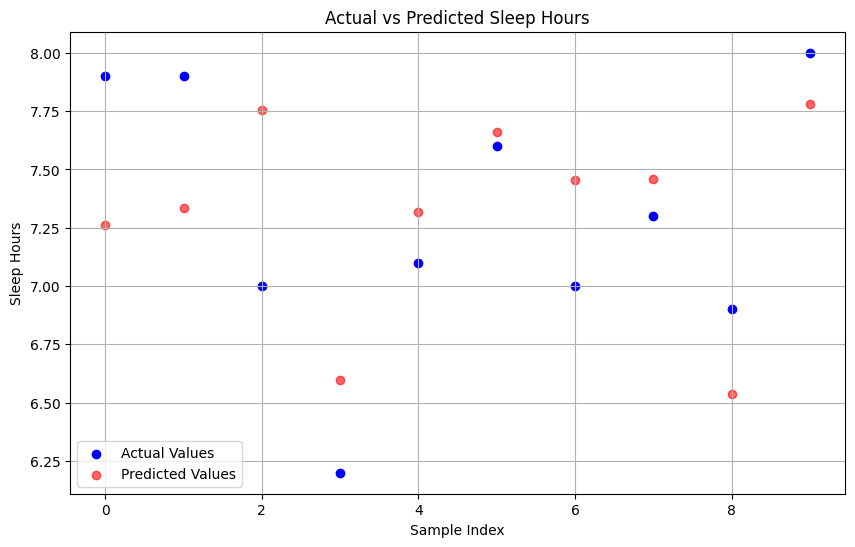

In [36]:
# Visualizing predictions and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Values', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Sleep Hours')
plt.title('Actual vs Predicted Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()


In [37]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# R-Squared (R²)
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-Squared (R²): {r2}")

Mean Squared Error (MSE): 0.19713339999999896
R-Squared (R²): 0.3176413984077572


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='r2',
                           cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}


In [39]:
# Creating a new model
best_rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    random_state=42
)

# Training the model on the training set
best_rf_model.fit(X_train, y_train)

# Making predictions on the test set
y_pred_best = best_rf_model.predict(X_test)

# Performance evaluation
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Optimized Model Mean Squared Error (MSE): {mse_best}")
print(f"Optimized Model R-Squared (R²): {r2_best}")


Optimized Model Mean Squared Error (MSE): 0.19161242257574912
Optimized Model R-Squared (R²): 0.33675173909398026


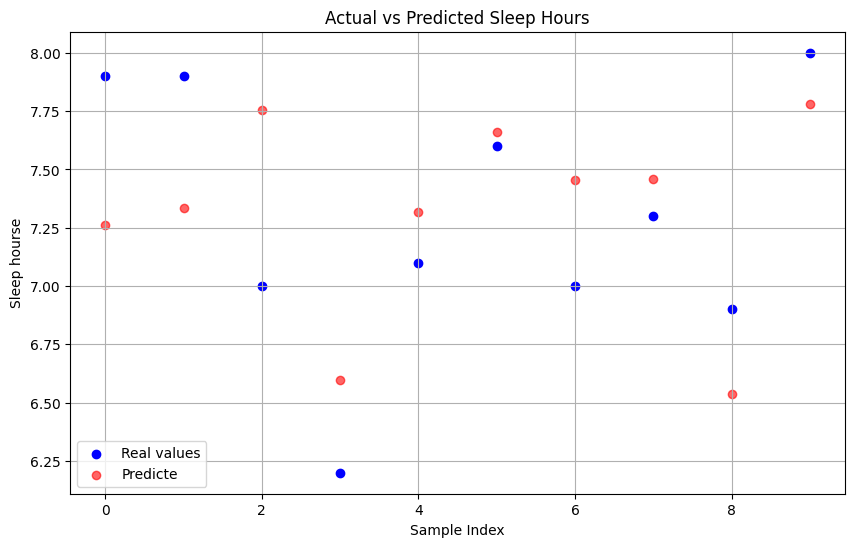

In [40]:
# Visualizing predicted and actual values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real values')
plt.scatter(range(len(y_pred_best)), y_pred_best, color='red', label='Predicte', alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Sleep hourse')
plt.title('Actual vs Predicted Sleep Hours')
plt.legend()
plt.grid(True)
plt.show()
